# High-order polynomial models

We use higher-order polynomials to achieve an exact fit to a data set. Given a data set with $m$ points, a polynomial of degree $p-1$ can be adjusted to fit the data exactly.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Two data points example

Consider the example from class with two data point ($m=2$). A straight line can be adjusted to go exactly through two data points. Let's say our data points are (1,4) and (4,6).

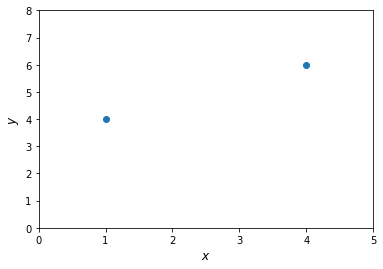

In [7]:
x1 = np.array([1,4])
y1 = np.array([4,6])
plt.plot(x1, y1, 'o')
plt.xlim(0,5) # adjust the x limits so we can see the two points better
plt.ylim(0,8)
plt.xlabel(r'$x$',fontsize=12)
plt.ylabel(r'$y$',fontsize=12);

Clearly the line that goes through these two points will have a slope

$$ m = \frac{6-4}{4-1} = \frac{2}{3} $$

In point slope form (using the first point) it is

$$ (y - 4) = \frac{2}{3} (x-1) $$

So that

$$ y = \frac{2}{3}x + \frac{10}{3} $$

Another way of setting up this problem is to use a system of equations

$$ 4 = m(1) + b $$
$$ 6 = m(4) + b $$

This will result in the same values of $m=\frac23$ and $b=\frac{10}{3}$.

## As a matrix equation

The above form is a system of linear equations. Therefore it can be written in matrix form. The general notation we will use in class for a polynomial of degree $n$ is

$$ y = a_0 + a_1 x + a_2 x^2 + \ldots + a_n x^n $$

So for the example above, $a_0 = b$ and $a_1 = m$. The column vector $\vec{a}^T = \left(a_0, a_1 \right)$. Writing the above system in our notation as a matrix equation gives

$$ \hat{A} \vec{a} = \vec{b} $$

where $\hat{A}$ is a square 2x2 matrix, $\vec{a}$ is given above, and $\vec{b}$ is a vector of data points (y values). 

For this problem

$$ \hat{A} = \begin{pmatrix} 1^0 & 1^1 \\
                             4^0 & 4^1\end{pmatrix} = \begin{pmatrix} 1 & 1 \\
                             1 & 4\end{pmatrix}$$
$$ \vec{b}^T = \left( 4, 6 \right) $$

So that

$$ \begin{pmatrix} 1 & 1 \\1 & 4\end{pmatrix}
   \begin{pmatrix} a_0 \\ a_1 \end{pmatrix} = \begin{pmatrix} 4 \\ 6 \end{pmatrix} $$
   
 
This is the matrix problem we will set up in `numpy`.

In [10]:
Amx1 = np.array([[1,1],[1,4]]) # a matrix is a list of lists. each list is a row of the matrix
bvec1 = np.array([4,6])

Here is how to check the shape of matrices and vectors to make sure they have the right dimensions

In [11]:
np.shape(Amx1)

(2, 2)

In [12]:
np.shape(bvec1)

(2,)

`numpy` is good at figuring out whether you need a row vector or column vector when solving matrix equations, so it will typically take transposes for you when needed. It will not do this as much with matrices.

So, how to solve the matrix equation for $\vec{a} = \left(a_0, a_1 \right)$. I am sure you have spent a lot of time thinking about how to do this in linear algebra. Luckily, `numpy` has inversion and matrix decomposition functions built right in. You only need to do something complicated when you have sparse, ill-conditioned, or otherwise weird linear algebra problems. For the most part, you can just use the built-in function

`np.linalg.inv` to take a matrix inverse. Matrix multiplication is done either with `np.dot` or with the `@` symbol.

Here we know that 

$$ \vec{a} = \hat{A}^{-1} \vec{b} $$

In [13]:
avec1 = np.linalg.inv(Amx1) @ bvec1

In [14]:
print(avec1)

[3.33333333 0.66666667]


Well, what do you know! The first coefficient $a_0 = b = 3.33333\ldots = \frac{10}{3}$ and the second coefficient $a_1 = m = 0.66666\ldots = \frac23$

# 2. Three data points example

Three data points can be fit exactly using a quadratic polynomial $y = a_0 + a_1 x + x_2 x^2$. Say we have the points $(x_1,y_1)$, $(x_2,y_2)$, and $(x_3,y_3)$. Our system of linear equations would be

$$ a_0 + a_1 x_1 + a_2 x_1^2 = y_1 $$

$$ a_0 + a_1 x_2 + a_2 x_2^2 = y_2 $$

$$ a_0 + a_1 x_3 + a_2 x_3^2 = y_3 $$

As a matrix equation then we have

$$ \hat{A} \vec{a} = \vec{b} $$

$$ \begin{pmatrix} 1 & x_1 & x_1^2 \\ 1 & x_2 & x_2^2 \\ 1 & x_3 & x_3^2\end{pmatrix}
   \begin{pmatrix} a_0 \\ a_1 \\ a_2 \end{pmatrix} = \begin{pmatrix} y_1 \\ y_2 \\ y_3 \end{pmatrix} $$

Say we have three data points $(1,1)$, $(2,2)$, and $(-1,-5)$

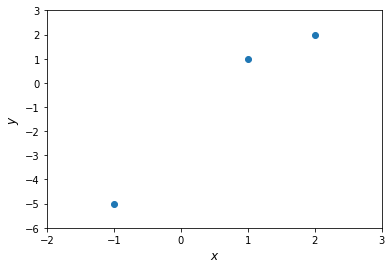

In [18]:
xvals2 = np.array([1,2,-1])
yvals2 = np.array([1,2,-5])
plt.plot(xvals2, yvals2, 'o')
plt.xlim(-2,3) # adjust the x limits so we can see the two points better
plt.ylim(-6,3)
plt.xlabel(r'$x$',fontsize=12)
plt.ylabel(r'$y$',fontsize=12);

Let's set up the matrix equation

In [19]:
Amx2 = np.array([ [1, 1, 1], [1, 2, 4], [1, -1, 1] ])
bvec2 = np.array([1,2,-5])

In [20]:
avec2 = np.linalg.inv(Amx2) @ bvec2

In [21]:
print(avec2)

[-1.33333333  3.         -0.66666667]


These are the values for $a_0 = -\frac{4}{3}$, $a_1 = 3$, and $a_2 = -\frac{2}{3}$. Let's make sure these are correct by making a prediction for the polynomial model

$$ y = f(x) = -\frac{4}{3} + 3x -\frac{2}{3}x^2 $$

In [22]:
npred2 = 50
xpred2 = np.linspace(-2,3,num=npred2)
ypred2 = np.empty(npred2)
for i in range(0,npred2):
    ypred2[i] = avec2[0] + avec2[1]*xpred2[i] + avec2[2]*xpred2[i]**2.0

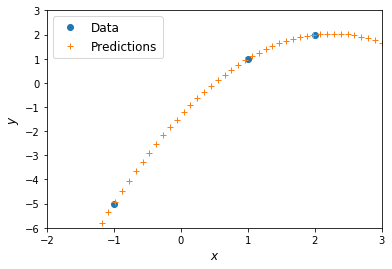

In [23]:
plt.plot(xvals2, yvals2, 'o', label='Data')
plt.plot(xpred2, ypred2, '+', label='Predictions')
plt.xlim(-2,3) # adjust the x limits so we can see the two points better
plt.ylim(-6,3)
plt.xlabel(r'$x$',fontsize=12)
plt.ylabel(r'$y$',fontsize=12)
plt.legend(fontsize=12);

As expected, this polynomial crosses through the data points exactly!

### Another check to make sure you did it right

You can also check right at the data points to make sure you did ok.

In [26]:
n2 = len(xvals2)
for i in range(0,n2):
    print('Prediction =', '{:8.4f}'.format(avec2[0] + avec2[1]*xvals2[i] + avec2[2]*xvals2[i]**2.0))
    print('Data point =', yvals2[i])    

Prediction =   1.0000
Data point = 1
Prediction =   2.0000
Data point = 2
Prediction =  -5.0000
Data point = -5


Good, they all match exactly! Another way of saying this is that the absolute error should be equal to zero.

# 3. Setting up matrices with loops

In this last example, let's look at the 8 data point set from class. I do not recommend trying to write out the matrices and vectors by hand for something like this. It is too easy to make a mistake. It would be better to do this one algorithmically.

For 8 data points, we need a degree 7 polynomial to fit the data points perfectly. 

$$ y = a_0 + a_1 x + a_2 x^2 + \ldots + a_7 x^7 $$

This will result in a system of 8 equations with the 8 unknowns being the above coefficients $\vec{a} = \left( a_0, a_1, a_2, a_3, a_4, a_5, a_6, a_7\right)$.

The rows of the matrix will be the x values of the data points raised to each power from 0 to 7. The columns will through each of the 8 data points. Therefore we will have an 8x8 matrix

$$ \hat{A} = \begin{pmatrix}
x_1^0 & x_1^1 & x_1^2 & \ldots & x_1^7 \\
x_2^0 & x_2^1 & x_2^2 & \ldots & x_2^7 \\
\vdots & \vdots & \vdots & \vdots &\vdots \\
x_7^0 & x_7^1 & x_7^2 & \ldots & x_7^7 \\
x_8^0 & x_8^1 & x_8^2 & \ldots & x_8^7 
\end{pmatrix} $$

Building this matrix by hand will be very tedious. What I suggest to do is used **nested for loops** to fill up the matrix. Let's set up the data points from the example and then I will show how to set up the matrix.

In [32]:
xvals3 = np.array([1,2,3,4,5,6,7,8])
yvals3 = np.array([205,430,677,945,1233,1542,1872,2224])
n3 = len(xvals3)

Here we will set up the 8x8 matrix of powers of x values

In [33]:
Amx3 = np.empty( (n3,n3) )
for i in range(0,n3): # iterate over rows
    for j in range(0, n3): # iterate over columns
        Amx3[i,j] = xvals3[i]**float(j) 

In [34]:
print(Amx3)

[[1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00
  1.000000e+00 1.000000e+00 1.000000e+00]
 [1.000000e+00 2.000000e+00 4.000000e+00 8.000000e+00 1.600000e+01
  3.200000e+01 6.400000e+01 1.280000e+02]
 [1.000000e+00 3.000000e+00 9.000000e+00 2.700000e+01 8.100000e+01
  2.430000e+02 7.290000e+02 2.187000e+03]
 [1.000000e+00 4.000000e+00 1.600000e+01 6.400000e+01 2.560000e+02
  1.024000e+03 4.096000e+03 1.638400e+04]
 [1.000000e+00 5.000000e+00 2.500000e+01 1.250000e+02 6.250000e+02
  3.125000e+03 1.562500e+04 7.812500e+04]
 [1.000000e+00 6.000000e+00 3.600000e+01 2.160000e+02 1.296000e+03
  7.776000e+03 4.665600e+04 2.799360e+05]
 [1.000000e+00 7.000000e+00 4.900000e+01 3.430000e+02 2.401000e+03
  1.680700e+04 1.176490e+05 8.235430e+05]
 [1.000000e+00 8.000000e+00 6.400000e+01 5.120000e+02 4.096000e+03
  3.276800e+04 2.621440e+05 2.097152e+06]]


Be careful when reading this because it is output in scientific notation. I hope you agree with me that you would rather use nested for loops to set up this matrix rather than calculating **sixty four matrix entries by hand!!**

Now we can solve the matrix problem to get the polynomial coefficients. We don't really need to set up a `bvec3` variable because the y values are already stored in `yvals3`.

In [35]:
avec3 = np.linalg.inv(Amx3) @ yvals3

In [36]:
print(avec3)

[-1.40000000e+01  2.32911905e+02 -2.90833333e+01  1.97847222e+01
 -5.35416667e+00  8.01388889e-01 -6.25000000e-02  1.98412698e-03]


Let's make sure this is correct by plotting the predictions from this result vs. the data points.

In [38]:
npred3 = 50
xpred3 = np.linspace(0,9,num=npred2)
ypred3 = np.empty(npred2)
for i in range(0,npred2): # iterate over x values at which to predict
    # loop over powers of x instead of typing them all in by hand
    ypred3[i] = 0.0
    for j in range(0, n3): 
        ypred3[i] += avec3[j]*xpred3[i]**float(j)

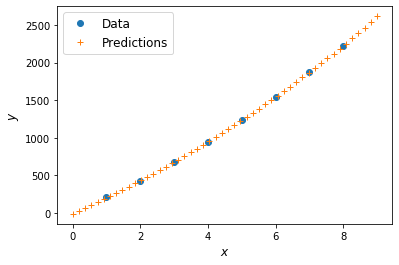

In [39]:
plt.plot(xvals3, yvals3, 'o', label='Data')
plt.plot(xpred3, ypred3, '+', label='Predictions')
plt.xlabel(r'$x$',fontsize=12)
plt.ylabel(r'$y$',fontsize=12)
plt.legend(fontsize=12);

As expected, we get a perfect result that crosses through all data points exactly!